# Lending Club Case Study

This jupyter file contains the analysis of the loan dataset for the Lending Club Case Study.

The analysis is divided into four main parts:
1. Data sourcing/understanding 
2. Data cleaning (cleaning missing values, removing redundant columns, etc.)
3. Data Analysis 
4. Conclusion


### Data Sourcing/Understanding

Importing required libraries and loading the data into dataframe

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv("loan\loan.csv",low_memory=False)

#Lets look at the first five rows of the dataframe loan_data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [212]:
#Lets look at all the column names and the datatypes

loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Cleaning

Some columns have a large number of missing values, lets first fix the missing values and then check for other types of data quality problems.

In [213]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [214]:
# percentage of missing values in each column
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [215]:
#Printing all the columns having more than 90% missing values
miss_col = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
print(miss_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

#### Removing columns with more than 90% missing values

In [216]:
loan_data = loan_data.drop(miss_col, axis=1)
print(loan_data.shape)

(39717, 55)


In [217]:
#Summarising number of missing values again
100*(loan_data.isnull().sum()/len(loan_data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### We are ignoring columns with lesser number of missing values since creating models is not in the scope

But let's check whether some rows have a large number of missing values.

In [218]:
#Missing values in rows
loan_data.isnull().sum(axis=1)

0        2
1        1
2        3
3        0
4        0
        ..
39712    4
39713    4
39714    6
39715    6
39716    4
Length: 39717, dtype: int64

In [219]:
# checking whether some rows have more than 5 missing values
len(loan_data[loan_data.isnull().sum(axis=1) > 5].index)

4

Lets extract the numeric part from the variable employment length

In [220]:
#First, let's drop the missing values from the column (otherwise the regex code below throws error)
loan_data = loan_data[~loan_data['emp_length'].isnull()]

#Using regular expression to extract numeric values from the string
import re
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))

##### Looking at type of the columns again

In [221]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

#  Data Analysis  
Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 
1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.) 
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [222]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [223]:
# let's now remove the behaviour variables from analysis
analysis_data = loan_data.drop(behaviour_var, axis=1)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

We will not be using the variables zip code, address, state, etc.
The variable 'title' is also derived from the variable 'purpose. So let's get rid of all these variables as well

In [224]:
analysis_data = analysis_data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [225]:
analysis_data['loan_status'] = analysis_data['loan_status'].astype('category')
analysis_data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

# You can see that the 'Fully Paid' status of loan comprises the most. The ones marked 'Current' are neither fully paid not defaulted, so let's get rid of the 'Current' loans. Also, let's tag the other two values as 0 or 1.

Univariate Analysis
First, let's look at the overall default rate.

In [226]:
#Filtering only the fully paid or charged-off loans
analysis_data = analysis_data[analysis_data['loan_status'] != 'Current']
analysis_data['loan_status'] = analysis_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#Converting the loan_status to integer type 0 or 1
analysis_data['loan_status'] = analysis_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
analysis_data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

Univariate Analysis
First, let's look at the overall default rate.

In [227]:
# default rate
round(np.mean(analysis_data['loan_status']), 2)

0.14

The overall default rate is about 14%.

Let's first visualise the average default rates across categorical variables.

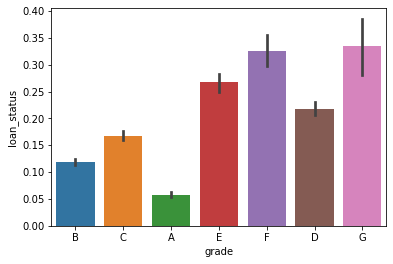

In [228]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=analysis_data)
plt.show()

In [229]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=analysis_data)
    plt.show()

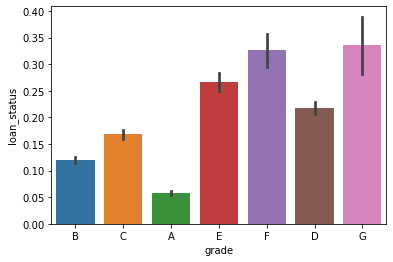

In [230]:
# compare default rates across grade of loan
plot_cat('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan data.

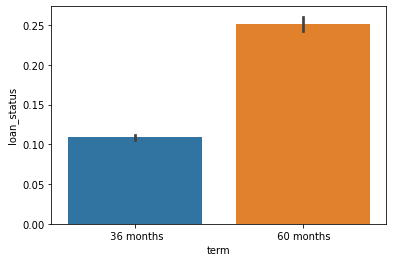

In [231]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

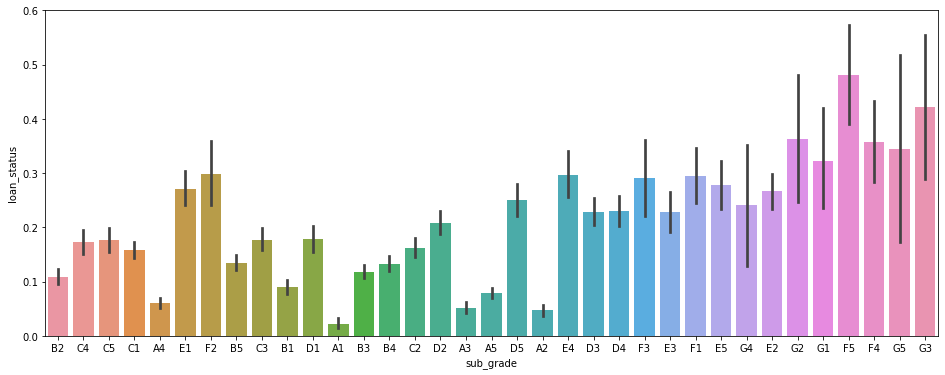

In [232]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

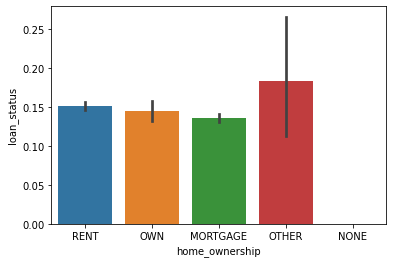

In [233]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

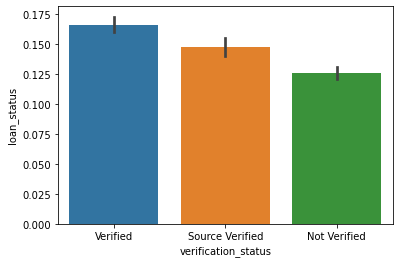

In [234]:
# verification_status: surprisingly, verified loans default more than not verified
plot_cat('verification_status')

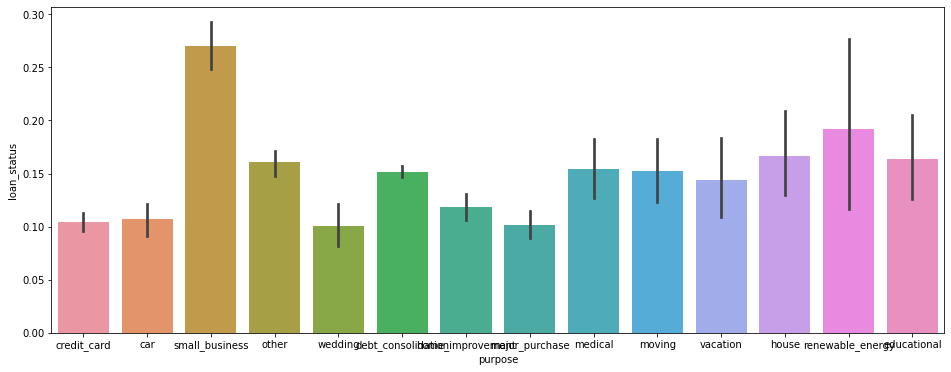

In [235]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [236]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
analysis_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [237]:
from datetime import datetime
analysis_data['issue_d'] = analysis_data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [238]:
# extracting month and year from issue_date
analysis_data['month'] = analysis_data['issue_d'].apply(lambda x: x.month)
analysis_data['year'] = analysis_data['issue_d'].apply(lambda x: x.year)

In [239]:
# let's first observe the number of loans granted across years
analysis_data.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

##### You can see that the number of loans has increased steadily across years

In [240]:
# number of loans across months
analysis_data.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

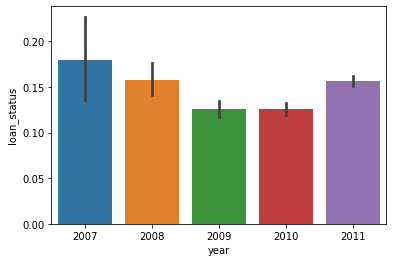

In [241]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

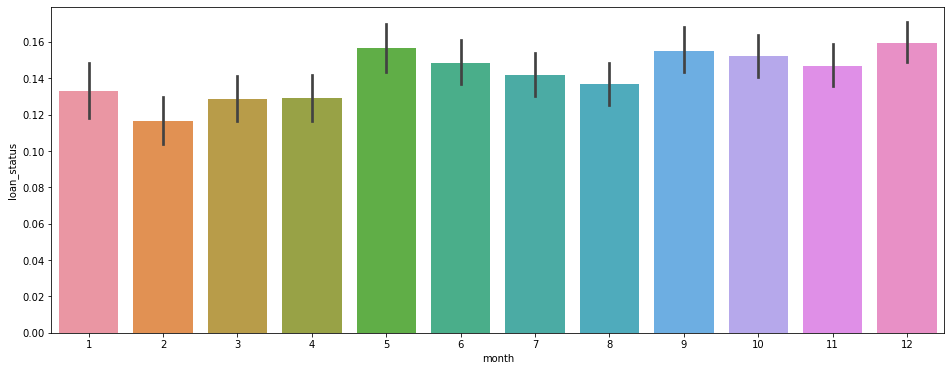

In [242]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plot_cat('month')

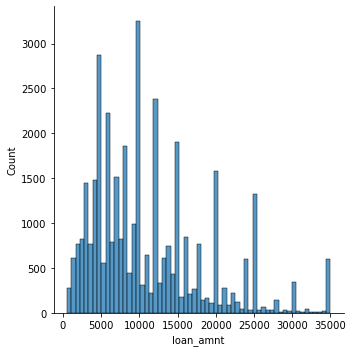

In [243]:
# loan amount: the median loan amount is around 10,000
sns.displot(analysis_data['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [244]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
analysis_data['loan_amnt'] = analysis_data['loan_amnt'].apply(lambda x: loan_amount(x))

In [245]:
analysis_data['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

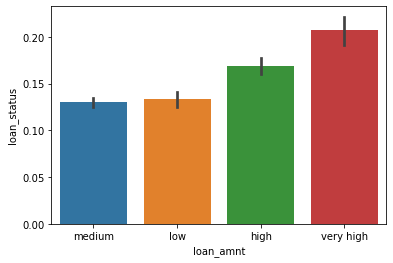

In [246]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [247]:
analysis_data['funded_amnt_inv'] = analysis_data['funded_amnt_inv'].apply(lambda x: loan_amount(x))

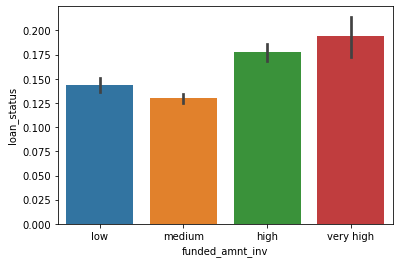

In [248]:
# interest rates are higher as the funded amount by investors is higher
plot_cat('funded_amnt_inv')

In [249]:
analysis_data['int_rate'] = analysis_data['int_rate'].str.rstrip('%').astype('float')

In [250]:
analysis_data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [251]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
analysis_data['int_rate'] = analysis_data['int_rate'].apply(lambda x: int_rate(x))

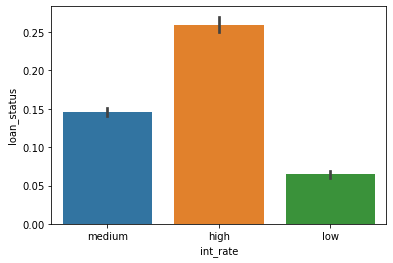

In [252]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat('int_rate')

In [253]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

analysis_data['dti'] = analysis_data['dti'].apply(lambda x: dti(x))

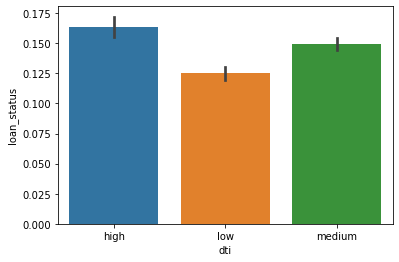

In [254]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [255]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
analysis_data['funded_amnt'] = analysis_data['funded_amnt'].apply(lambda x: funded_amount(x))

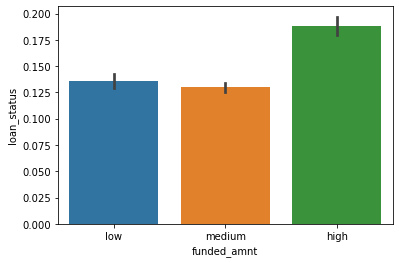

In [256]:
plot_cat('funded_amnt')

In [257]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
analysis_data['installment'] = analysis_data['installment'].apply(lambda x: installment(x))

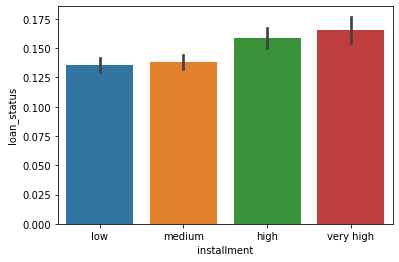

In [258]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [259]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

analysis_data['annual_inc'] = analysis_data['annual_inc'].apply(lambda x: annual_income(x))

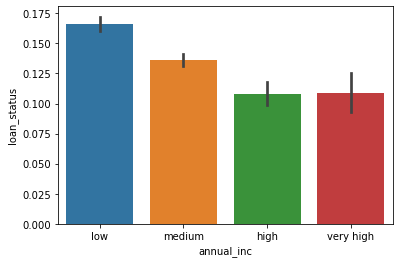

In [260]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')

In [261]:
# employment length
# first, let's drop the missing value observations in emp length
analysis_data = analysis_data[~analysis_data['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

analysis_data['emp_length'] = analysis_data['emp_length'].apply(lambda x: emp_length(x))

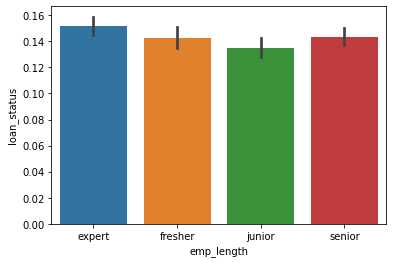

In [262]:
# emp_length and default rate
# not much of a predictor of default
plot_cat('emp_length')

## Segmented Univariate Analysis

Segmented Univariate Analysis
We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

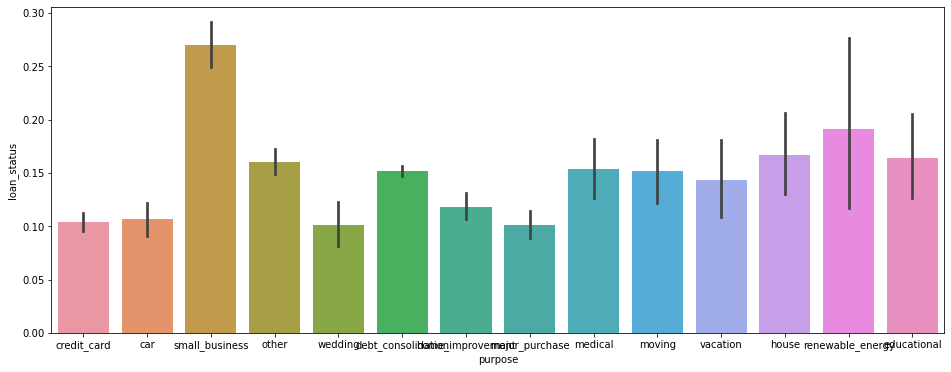

In [264]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

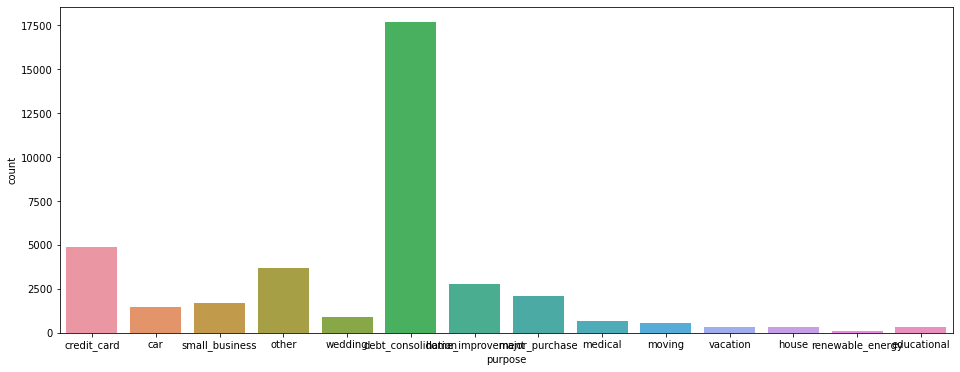

In [265]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=analysis_data)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [267]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
analysis_data = analysis_data[analysis_data['purpose'].isin(main_purposes)]
analysis_data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

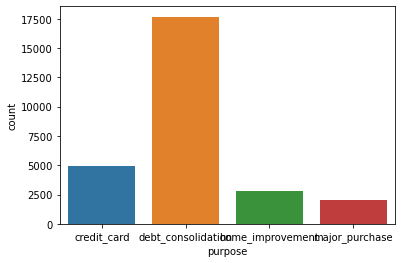

In [268]:
# plotting number of loans by purpose 
sns.countplot(x=analysis_data['purpose'])
plt.show()

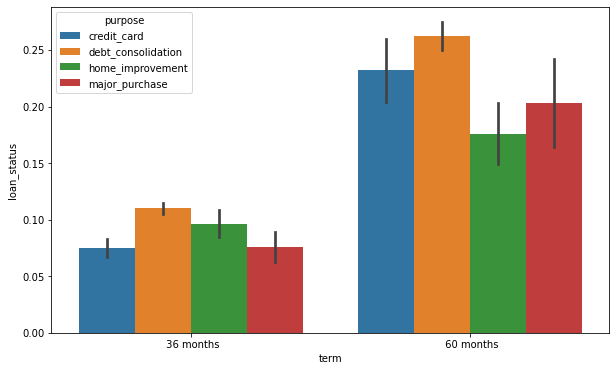

In [269]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=analysis_data)
plt.show()

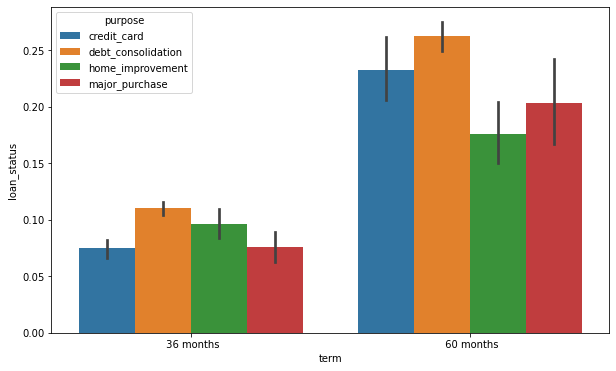

In [270]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=analysis_data)
    plt.show()

    
plot_segmented('term')

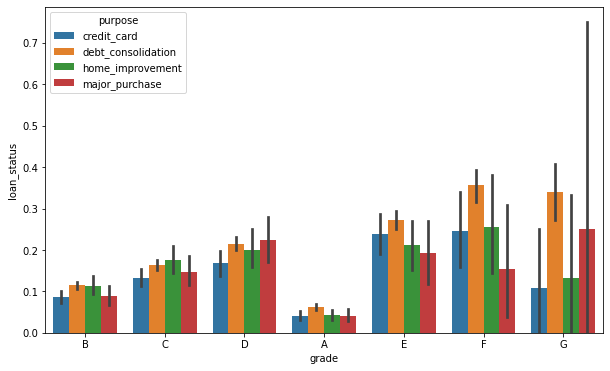

In [271]:
# grade of loan
plot_segmented('grade')

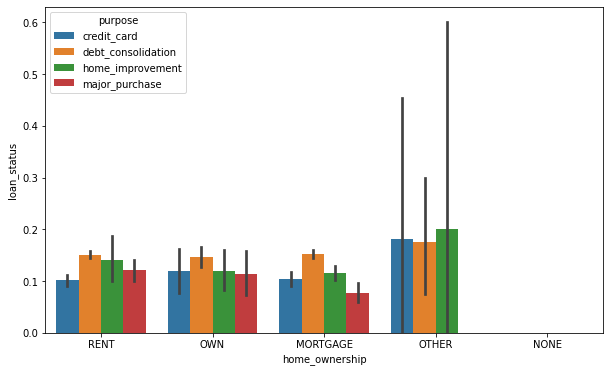

In [272]:
# home ownership
plot_segmented('home_ownership')

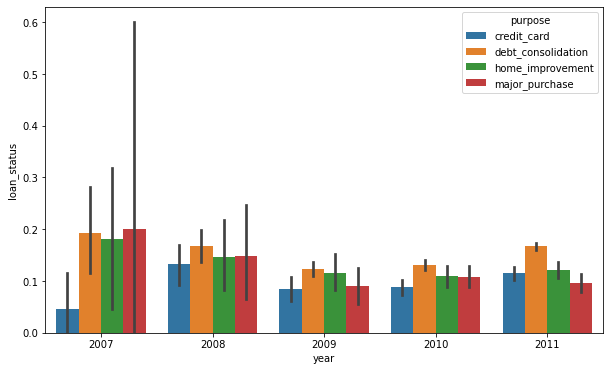

In [273]:
# year
plot_segmented('year')

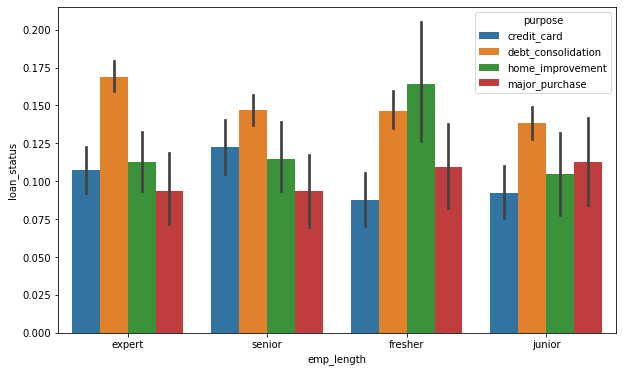

In [274]:
# emp_length
plot_segmented('emp_length')

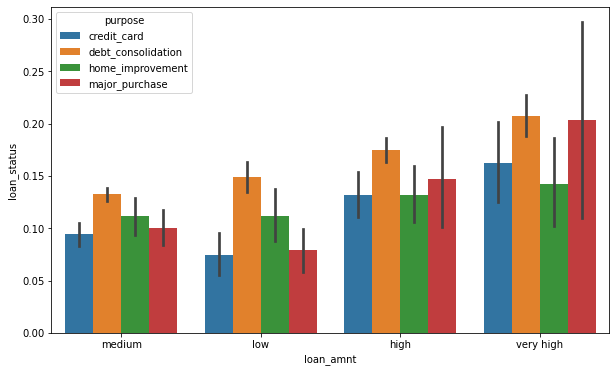

In [282]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

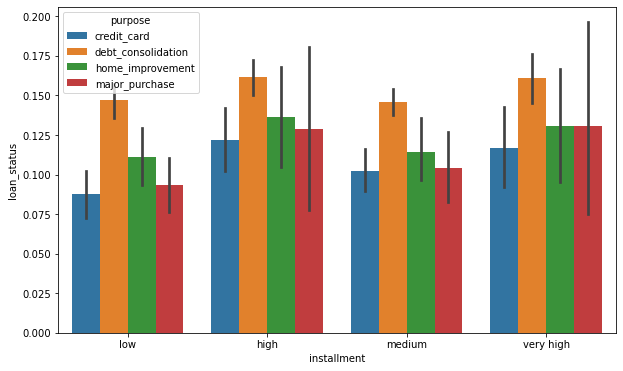

In [276]:
# installment
plot_segmented('installment')

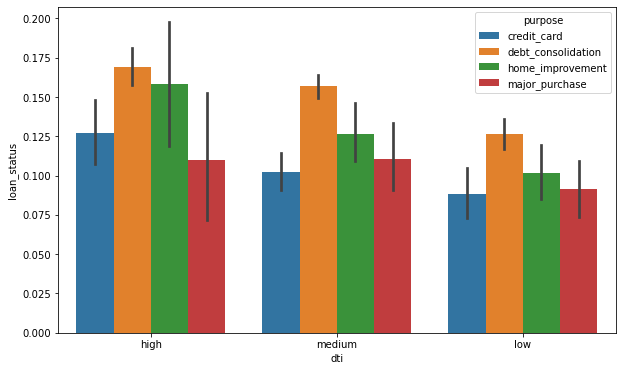

In [277]:
# debt to income ratio
plot_segmented('dti')

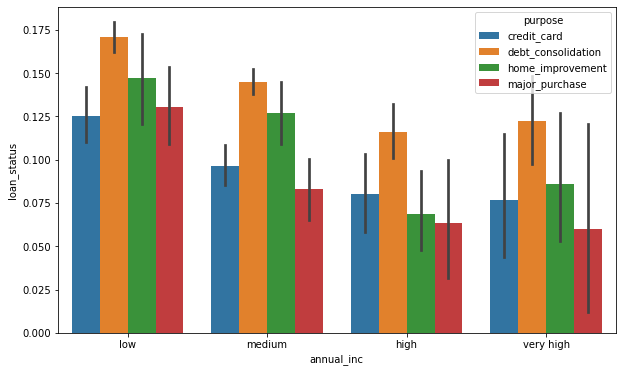

In [278]:
# annual income
plot_segmented('annual_inc')

In [279]:
# variation of default rate across annual_inc
analysis_data.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [280]:
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = analysis_data.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [281]:
# filtering all the object type variables
df_categorical = analysis_data.loc[:, analysis_data.dtypes == object]
df_categorical['loan_status'] = analysis_data['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in analysis_data.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'dti', 'mths_since_last_delinq', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


C:\Users\2694\AppData\Local\Temp/ipykernel_21352/1311504557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['loan_status'] = analysis_data['loan_status']
